# Dataset exploration

In [10]:
#imports
import sys
sys.path.append('/home/elenaruiz/Documents/FNC')
import pandas as pd
import numpy as np
from src.utils import io
from src.fake_news_detector.core.nlp import clean_text as ct

### Import original dataset

In [2]:
articles = io.read_json_file('/home/elenaruiz/Documents/FNC/src/data/tmp.json')
df = pd.DataFrame(data=articles['articles'])

## Exploration

El dataset contiene los siguientes datos:
- Fake: True si es fake, False si es real.
- Subtitle: Texto plano del subtitulo
- Text: El cuerpo del articulo, divido en una lista de string por párrafos
- Title: Texto plano del titulo
- URL: URl de la fuente.

In [3]:
df.head()

,fake,subtitle,text,title,url
0,True,The finding has made speculate to internationa...,[The Thai police have clarified to the middle ...,They find a corpse in a vegetarian restaurant ...,https://www.lavanguardia.com/comer/al-dia/2018...
1,True,A spokesman for the Swiss government clarifies...,"[The Swiss government has said Tuesday that ""a...",Switzerland warns that it will not authorize a...,https://www.lavanguardia.com/politica/20180220...
2,True,may not be used in schools,"[The Government of Navarra, within the Skolae ...","Navarre censors Songs of Amaral, Shakira and t...",https://www.marca.com/tiramillas/musica/2018/1...
3,True,Now the truth has been discovered,[Carmen Jiménez told her family and friends 28...,A woman pretends to be blind for 28 years not ...,http://www.marca.com/tiramillas/actualidad/201...
4,True,He recognized his actions after a discussion,"[Lewis Williams, a worker at an engineering fi...",Arrested for ejaculating at her boss's coffee ...,http://www.marca.com/tiramillas/actualidad/201...


Split by class

In [57]:
fake_df = df.loc[df['fake'] == 1]
real_df = df.loc[df['fake'] == 0]

print('FAKE NEWS:', len(fake_df), ' ', len(fake_df)*100/len(df), '%')
print('REAL NEWS:', len(real_df), ' ', len(real_df)*100/len(df), '%')

FAKE NEWS: 56   55.445544554455445 %
REAL NEWS: 45   44.554455445544555 %


In [46]:
from src.fake_news_detector.core.data_process import word_frequency as wf

# TOKENIZE TITLE
def tokenize_colunm_of_text(dataset, label, stopwords):
    list_tokens = []
    for _, row in dataset.iterrows():
        tokens = ct.clean_text_by_word(row[label], stopwords)
        list_tokens.append(tokens)
    return list_tokens

def tokenize_colunm_of_text_list(dataset, label, stopwords):
    list_tokens = []
    for _, row in dataset.iterrows():
        tokens = []
        for paragraph in row[label]:
            tokens += ct.clean_text_by_word(paragraph, stopwords)
        list_tokens.append(tokens)
    return list_tokens

### Word frequency: Title

In [40]:
# Word frequency of title
titles_tokens = tokenize_colunm_of_text(df, 'title', True)
freqDist = wf.get_word_freq(titles_tokens, False, topn=300)

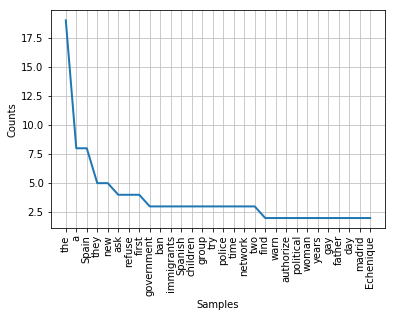

In [44]:
freqDist.plot(30,cumulative=False)

### Real News

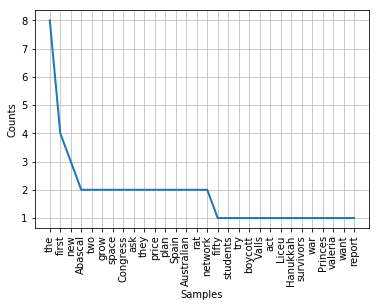

In [58]:
titles_tokens = tokenize_colunm_of_text(real_df, 'title', True)
freqDist = wf.get_word_freq(titles_tokens, False, topn=300)
freqDist.plot(30,cumulative=False)

In [52]:
### Fake News

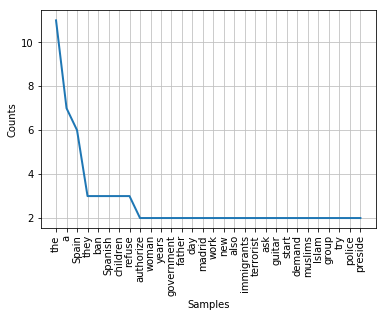

In [59]:
titles_tokens = tokenize_colunm_of_text(fake_df, 'title', True)
freqDist = wf.get_word_freq(titles_tokens, False, topn=300)
freqDist.plot(30,cumulative=False)

### Word frequency: Text

In [50]:
# Word frequency of title
titles_tokens = tokenize_colunm_of_text_list(df, 'text', True)
freqDist_text = wf.get_word_freq(titles_tokens, True, topn=300)

Number of unique words:  5436
Top 300 words:
[('the', 306), ('one', 114), ('say', 92), ('also', 81), ('it', 78), ('in', 75), ('Spanish', 58), ('take', 58), ('time', 57), ('years', 55), ('make', 54), ('use', 53), ('Spain', 52), ('new', 52), ('go', 50), ('people', 49), ('last', 45), ('case', 44), ('would', 44), ('already', 43), ('country', 41), ('year', 40), ('they', 38), ('could', 38), ('government', 37), ('end', 37), ('police', 36), ('like', 36), ('accord', 36), ('European', 36), ('give', 35), ('come', 35), ('work', 35), ('first', 34), ('a', 34), ('euros', 33), ('point', 33), ('we', 33), ('I', 32), ('explain', 32), ('even', 32), ('Madrid', 32), ('group', 31), ('among', 31), ('place', 31), ('find', 30), ('public', 29), ('this', 29), ('want', 29), ('right', 29), ('open', 28), ('social', 28), ('many', 28), ('change', 28), ('another', 28), ('know', 28), ('without', 27), ('two', 27), ('he', 25), ('state', 25), ('attack', 25), ('see', 24), ('add', 24), ('although', 24), ('consider', 24), ('d

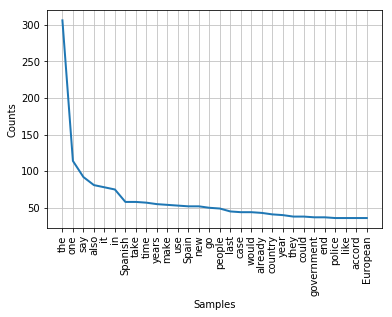

In [60]:
freqDist_text.plot(30,cumulative=False)

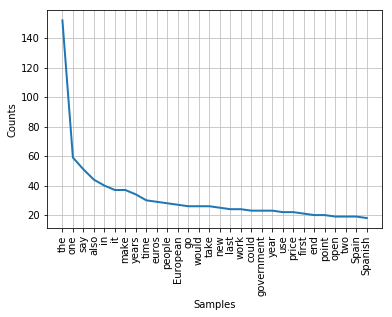

In [61]:
# Real news
titles_tokens = tokenize_colunm_of_text_list(real_df, 'text', True)
freqDist = wf.get_word_freq(titles_tokens, False, topn=300)
freqDist.plot(30,cumulative=False)

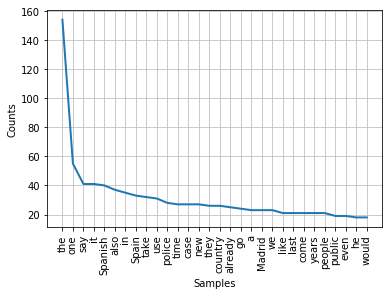

In [62]:
# Real news
titles_tokens = tokenize_colunm_of_text_list(fake_df, 'text', True)
freqDist = wf.get_word_freq(titles_tokens, False, topn=300)
freqDist.plot(30,cumulative=False)